In [1]:
# install openpyxl package
!pip install openpyxl
# download Canada.xlsx from github
!wget "https://github.com/hannansatopay/DSML/blob/master/Canada.xlsx?raw=true" -O Canada.xlsx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-07-21 05:52:29--  https://github.com/hannansatopay/DSML/blob/master/Canada.xlsx?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/hannansatopay/DSML/raw/master/Canada.xlsx [following]
--2022-07-21 05:52:29--  https://github.com/hannansatopay/DSML/raw/master/Canada.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hannansatopay/DSML/master/Canada.xlsx [following]
--2022-07-21 05:52:29--  https://raw.githubusercontent.com/hannansatopay/DSML/master/Canada.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserc

In [2]:
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd 

In [3]:
df_canada = pd.read_excel(
    "./Canada.xlsx", 
    sheet_name = 'Canada by Citizenship', 
    skiprows = range(20),
    skipfooter = 2
)
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


# Take a copy from df_canada

In [4]:
df = df_canada.copy()

df.set_index('OdName', inplace=True)
list(df.index)[:5]

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   AREA      195 non-null    int64 
 3   AreaName  195 non-null    object
 4   REG       195 non-null    int64 
 5   RegName   195 non-null    object
 6   DEV       195 non-null    int64 
 7   DevName   195 non-null    object
 8   1980      195 non-null    int64 
 9   1981      195 non-null    int64 
 10  1982      195 non-null    int64 
 11  1983      195 non-null    int64 
 12  1984      195 non-null    int64 
 13  1985      195 non-null    int64 
 14  1986      195 non-null    int64 
 15  1987      195 non-null    int64 
 16  1988      195 non-null    int64 
 17  1989      195 non-null    int64 
 18  1990      195 non-null    int64 
 19  1991      195 non-null    int64 
 20  1992      195 non-null    int64 
 21  1993  

In [6]:
# remove all columns except year columns
df.drop(
    columns = ['Type', 'Coverage', 'AREA', 'AreaName','REG', 'RegName', 'DEV', 'DevName'],
    inplace = True
)

In [7]:
Egypt_normal = df.loc['Egypt'] / df.loc['Egypt'].max()
Sudan_normal = df.loc['Sudan'] / df.loc['Sudan'].max()

In [8]:
years = range(1980, 2014) 

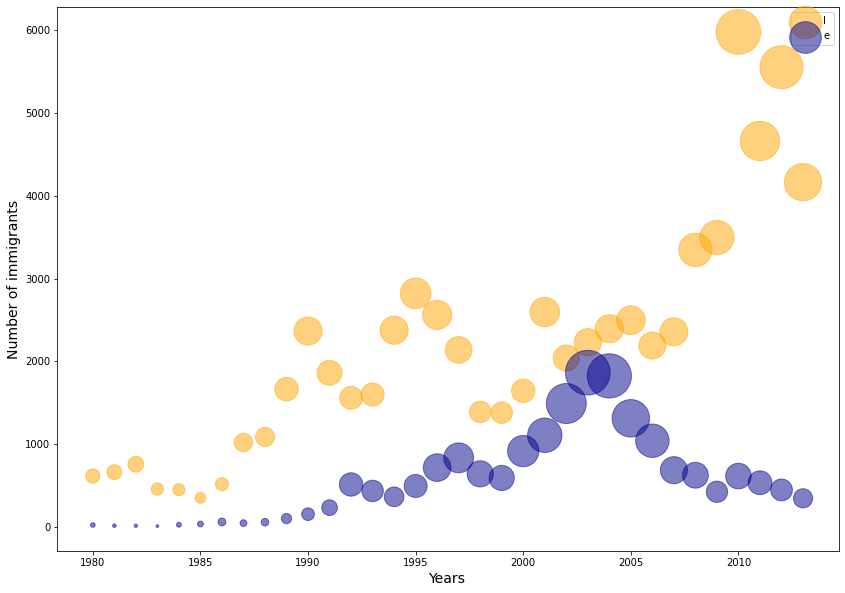

In [9]:
plt.figure(figsize=(14, 10))

plt.scatter(
    years, 
    df.loc['Egypt'], 
    color='orange', 
    alpha = 0.5,
    s = Egypt_normal * 2000,
    label = "Egypt"
)

plt.scatter(
    years, 
    df.loc['Sudan'], 
    color = 'darkblue', 
    alpha = 0.5,
    s = Sudan_normal * 2000,
    label = "Sudan"
)

plt.xlabel("Years", size=14);
plt.ylabel("Number of immigrants", size=14);
plt.legend('left');

Text(0, 0.5, 'Number of immigrants of Egypt')

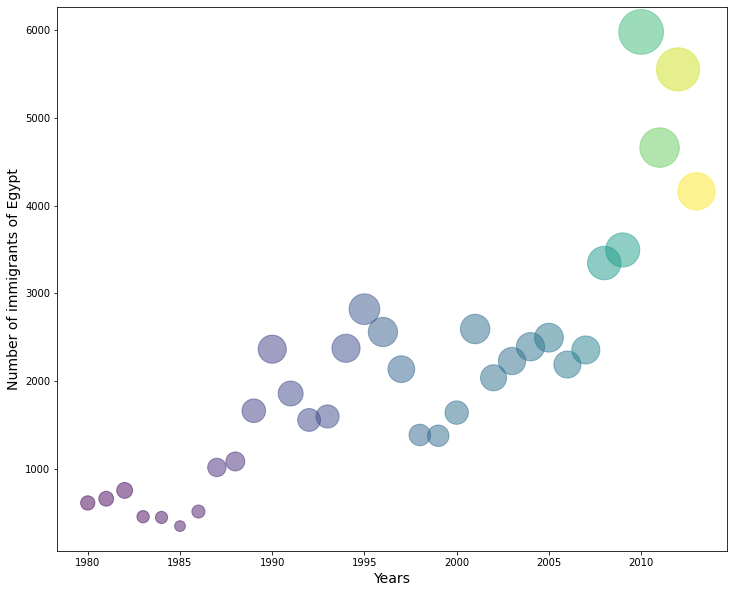

In [10]:
plt.figure(figsize=(12, 10))
plt.scatter(
    years, 
    df.loc['Egypt'], 
    #color = 'darkblue', 
    c = sorted(df.loc['Egypt']),
    alpha = 0.5,
    s = Egypt_normal * 2000
)
plt.xlabel("Years", size=14)
plt.ylabel("Number of immigrants of Egypt", size=14)

In [11]:
df['total'] = df.sum(axis = 1)
df.sort_values(by = 'total' ,ascending = False, axis = 0, inplace = True )

In [12]:
df_top5 = df.head(5)
df_top5 = df_top5[years].transpose()
df_top5.index = df_top5.index.map(int) # change the index value to type integer
df_top5

OdName,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [13]:
df_last5 = df.tail(5)
df_last5 = df_last5[years].transpose()
df_last5.index = df_last5.index.map(int) # change the index value to type integer
df_last5

OdName,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0
1985,0,0,0,0,0
1986,1,0,0,0,0
1987,0,0,0,0,0
1988,0,0,0,0,0
1989,0,0,0,0,0


Immigration Trend of Top5 Countries

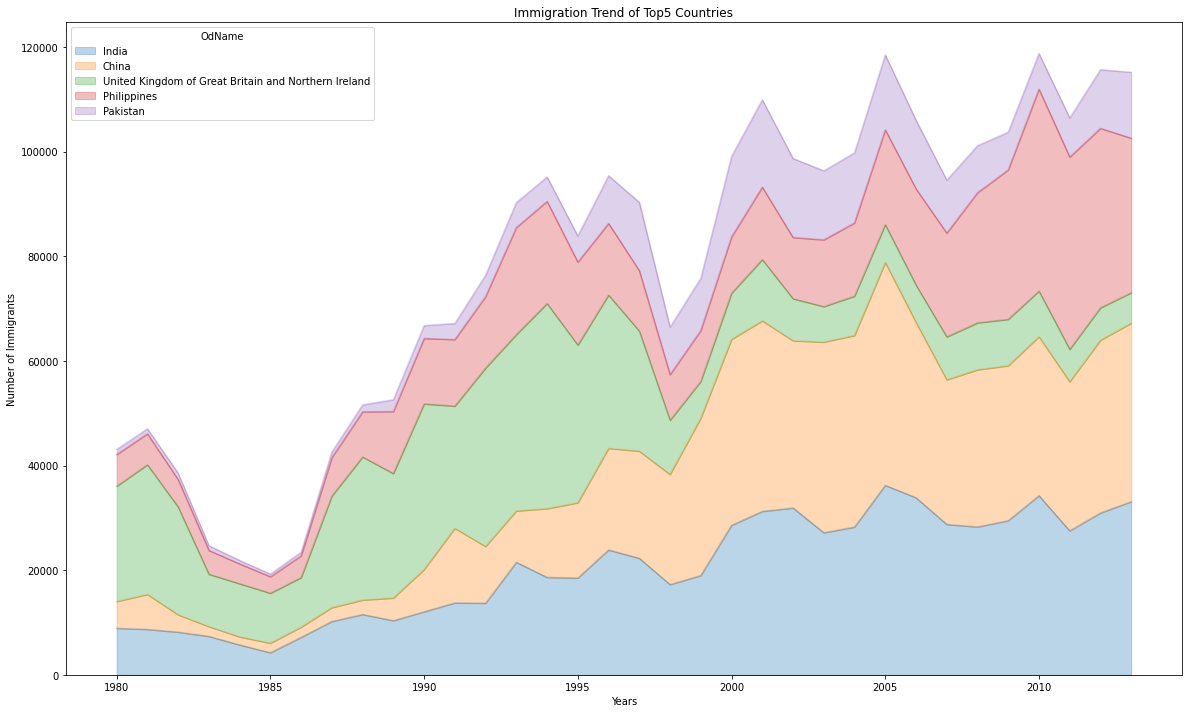

In [14]:
df_top5.plot(
    kind = 'area',
    #stacked = False, 
    figsize = (20,12),
    alpha = 0.3,
)
plt.title('Immigration Trend of Top5 Countries');
plt.ylabel('Number of Immigrants');
plt.xlabel('Years');

Immigration Trend of last5 Countries

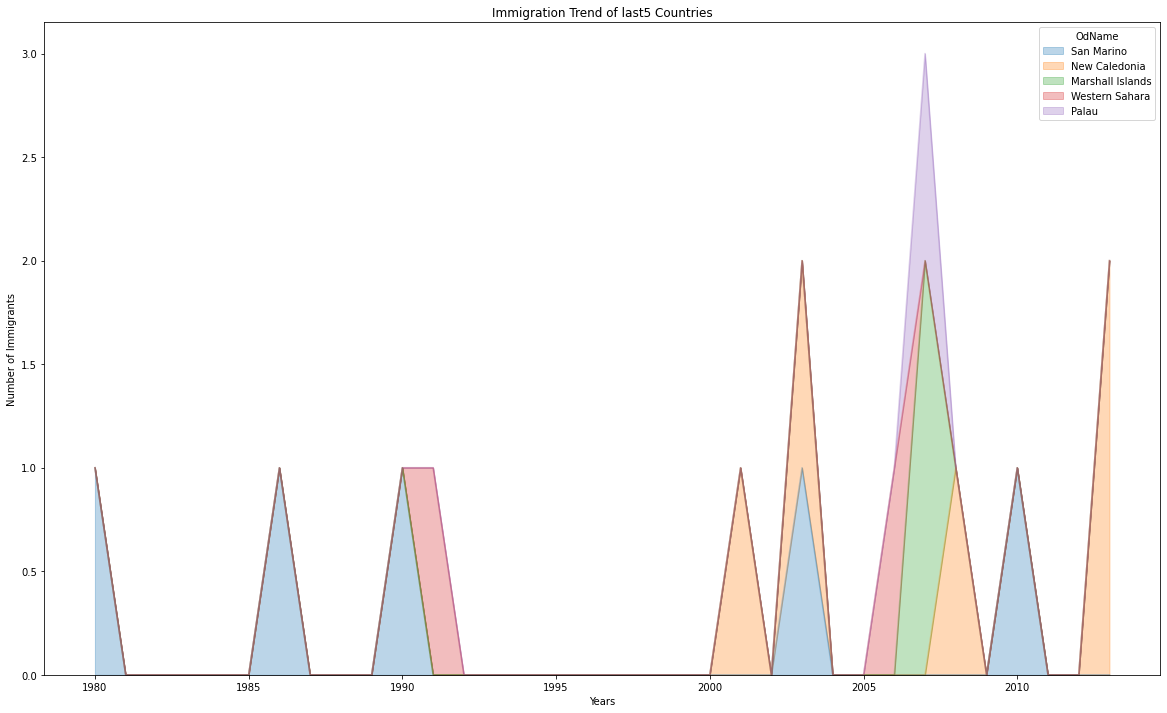

In [15]:
df_last5.plot(
    kind = 'area',
    #stacked = False, 
    figsize = (20,12),
    alpha = 0.3,
)
plt.title('Immigration Trend of last5 Countries');
plt.ylabel('Number of Immigrants');
plt.xlabel('Years');

In [16]:
## group countries by continents and apply sum() function 
df_continents = df_canada.groupby('AreaName', axis=0).sum()
# remove all columns except year columns
df_continents.drop(
    columns = ['AREA', 'REG', 'DEV'],
    inplace = True
)
df_continents['total'] = df_continents.sum(axis = 1)
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
AreaName,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


Immigration to Canada by Continent [1980 - 2013]

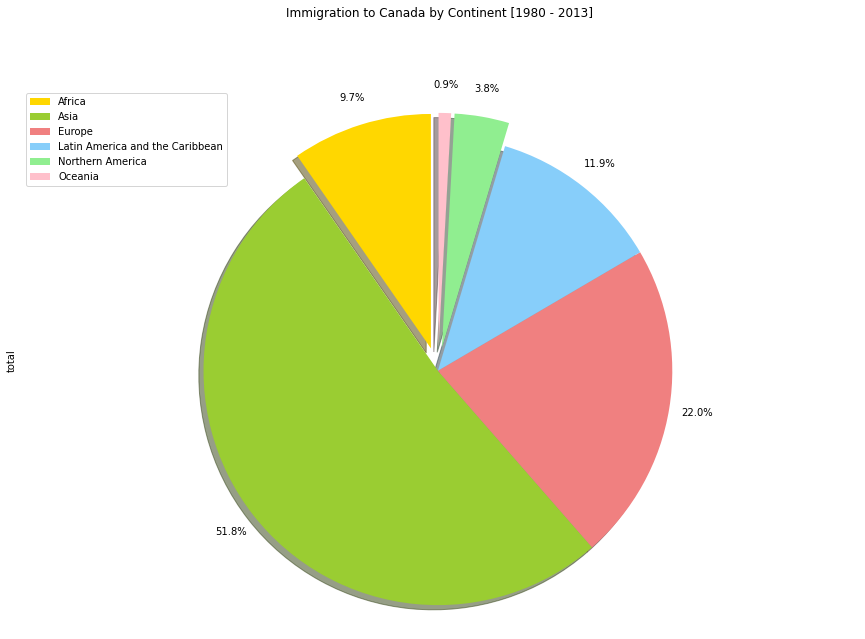

In [17]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['total'].plot(
    kind = 'pie',
    figsize = (15, 10),
    autopct = '%1.1f%%', 
    startangle = 90,    
    shadow = True,       
    labels = None,         # turn off labels on pie chart
    pctdistance = 1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
    colors = colors_list,  # add custom colors
    explode = explode_list # 'explode' lowest 3 continents
)

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels = df_continents.index, loc='upper left');